In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

We are introducing this new notebook to analyze whether additional columns will provide deeper insights into our analysis. Specifically, we aim to determine if the following columns:

- `MarketID` 
- `MarketSize` 
- `LocationID` 
- `AgeOfStore` 
- `Promotion` 
- `week` 
- `SalesInThousands` 

show any significant trends or patterns. We will conduct an exploratory data analysis (EDA) on each column to uncover potential relationships and their impact on the overall analysis.


In [2]:
marketing_df= pd.read_csv("/Users/pawanbtw/Downloads/WA_Marketing-Campaign.csv")
marketing_df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


We explored the dataset in-depth, including checking for null values, data types, and quantiles, as well as removing outliers to ensure a robust analysis. These steps were thoroughly documented in the `Fast Food AB Testing Analysis and Insights.ipynb` file, so we will be jumping directly into the analysis by focusing on the removal of outliers and a detailed examination of each column in this notebook.


## Remove outliers

In [3]:
def remove_outliers(dataframe, col_name, promo_type):
    # Filter data for the specific promotion type
    df_p = dataframe[dataframe['Promotion'] == promo_type]
    
    # Calculate the first and third quartiles
    quartile1 = np.percentile(df_p[col_name], 25)
    quartile3 = np.percentile(df_p[col_name], 75)
    
    # Calculate the interquartile range (IQR)
    interquantile_range = quartile3 - quartile1
    
    # Determine the upper and lower limits for outliers
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    # Return the dataframe without outliers
    return df_p[(df_p[col_name] >= low_limit) & (df_p[col_name] <= up_limit)]

cleaned_data_p1 = remove_outliers(marketing_df, 'SalesInThousands', 1)
cleaned_data_p2 = remove_outliers(marketing_df, 'SalesInThousands', 2)
cleaned_data_p3 = remove_outliers(marketing_df, 'SalesInThousands', 3)

In [4]:
clean_df = pd.concat([cleaned_data_p1, cleaned_data_p2, cleaned_data_p3], ignore_index=True)
clean_df.reset_index(drop=True, inplace=True)
clean_df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,3,12,1,1,44.54
1,1,Medium,3,12,1,2,37.94
2,1,Medium,3,12,1,3,45.49
3,1,Medium,3,12,1,4,34.75
4,1,Medium,7,15,1,1,42.92


In [5]:
clean_df.shape

(502, 7)

In [6]:
marketing_df.shape

(548, 7)

## Market ID

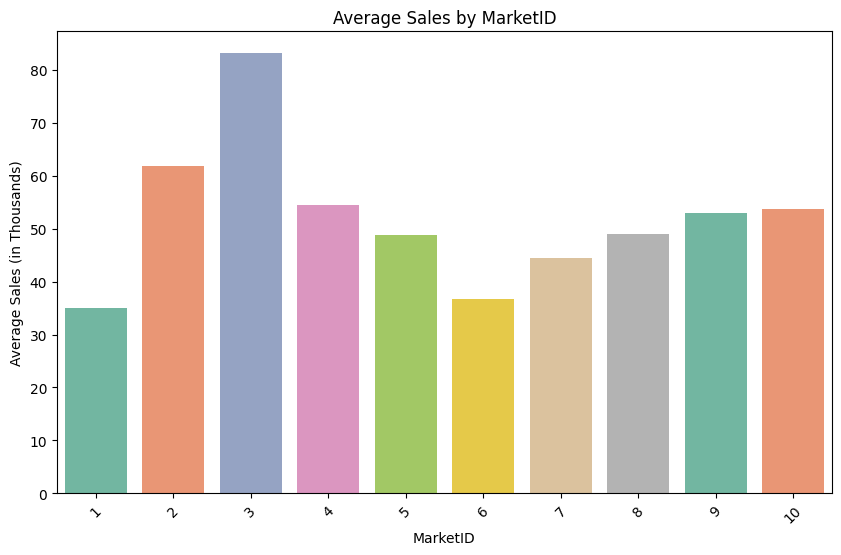

In [7]:
avg_sales_by_market_id = clean_df.groupby('MarketID')['SalesInThousands'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_market_id.index, y=avg_sales_by_market_id.values, palette='Set2')
plt.title('Average Sales by MarketID')
plt.xlabel('MarketID')
plt.ylabel('Average Sales (in Thousands)')
plt.xticks(rotation=45)
plt.show()

In [8]:
clean_df.groupby(["MarketID"]).agg({"SalesInThousands":["count","mean","median","sum"]})

SalesInThousands                            
                    count       mean  median      sum
MarketID                                             
1                      52  35.101731  35.675  1825.29
2                      24  61.761250  61.875  1482.27
3                      43  83.121860  83.020  3574.24
4                      36  54.508056  54.035  1962.29
5                      60  48.838000  48.740  2930.28
6                      59  36.720508  36.800  2166.51
7                      60  44.475333  43.385  2668.52
8                      48  48.952917  49.650  2349.74
9                      40  52.940750  52.525  2117.63
10                     80  53.776250  52.930  4302.10

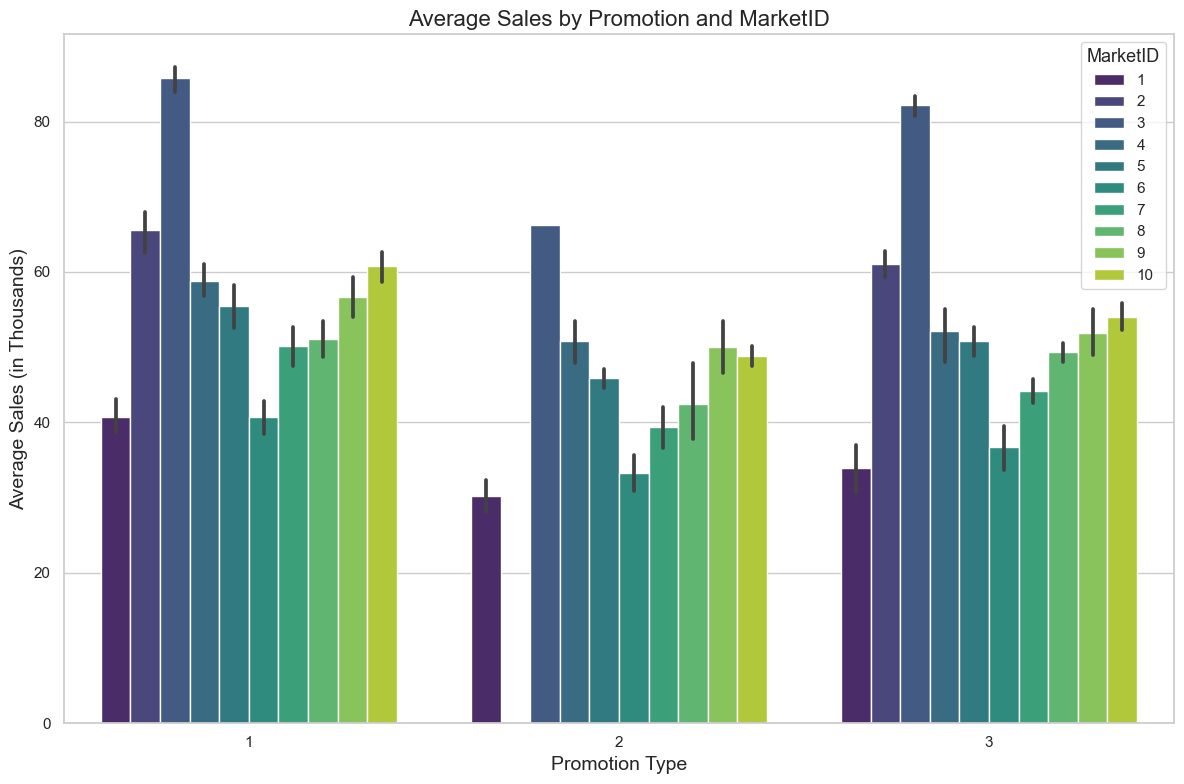

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=clean_df, x='Promotion', y='SalesInThousands', hue='MarketID', palette='viridis')
plt.title('Average Sales by Promotion and MarketID', fontsize=16)
plt.xlabel('Promotion Type', fontsize=14)
plt.ylabel('Average Sales (in Thousands)', fontsize=14)
plt.legend(title='MarketID', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

***MarketID - 3 TOP CHOICE***

The analysis reveals that `MarketID = 3` has the highest average sales value (`SalesInThousands`) across all promotions, with the best performance observed in `Promotion_1`. This indicates that MarketID 3 consistently outperforms other markets in terms of sales, making it the most effective market overall. Therefore, if we want to determine the best performing market based on sales, MarketID 3 stands out as the top choice.


# Market size

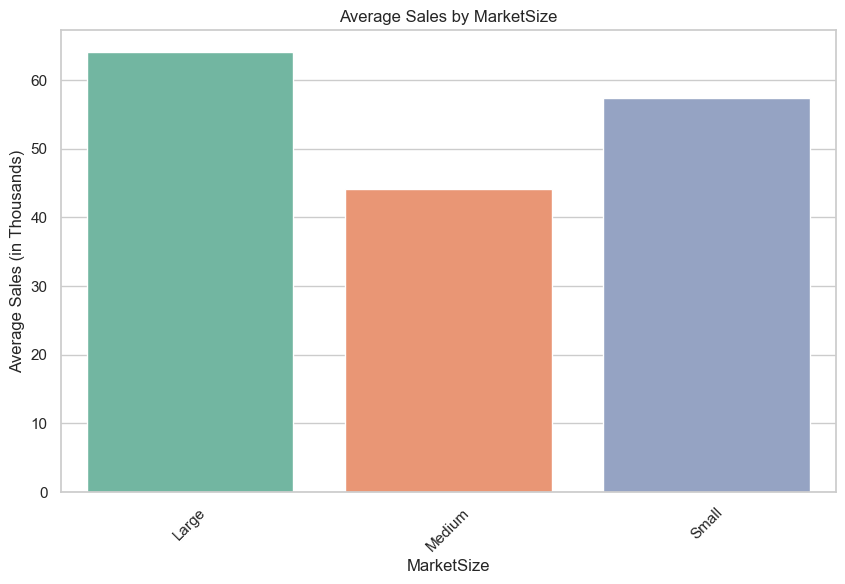

In [10]:
avg_sales_by_market_size = clean_df.groupby('MarketSize')['SalesInThousands'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_market_size.index, y=avg_sales_by_market_size.values, palette='Set2')
plt.title('Average Sales by MarketSize')
plt.xlabel('MarketSize')
plt.ylabel('Average Sales (in Thousands)')
plt.xticks(rotation=45)
plt.show()

In [11]:
clean_df.groupby(["MarketSize"]).agg({"SalesInThousands":["count","mean","median","sum"]})

SalesInThousands                             
                      count       mean  median       sum
MarketSize                                              
Large                   123  64.035285  60.590   7876.34
Medium                  319  44.068871  44.640  14057.97
Small                    60  57.409333  57.555   3444.56

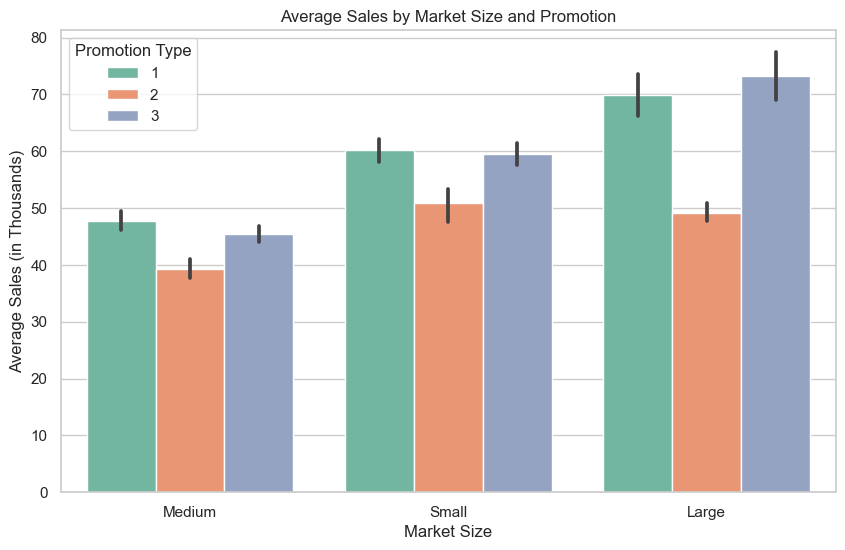

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=clean_df, x='MarketSize', y='SalesInThousands', hue='Promotion', palette='Set2')
plt.title('Average Sales by Market Size and Promotion')
plt.xlabel('Market Size')
plt.ylabel('Average Sales (in Thousands)')
plt.legend(title='Promotion Type')
plt.show()

The `Large` market size outperforms others with the highest average sales (`$64.04K`) and total sales sum (`$7,876.34K`). The `Small` market size, while slightly lower in average sales (`$57.41K`), contributes less overall due to fewer data points. The `Medium` market size has the lowest average sales (`$44.07K`). Therefore, targeting the `Large` market size offers the best sales performance.



# Age of Store

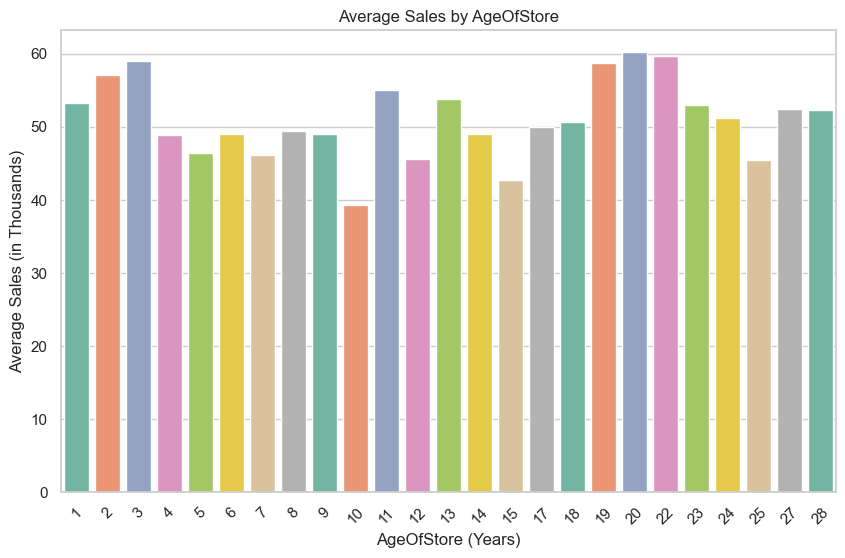

In [13]:
avg_sales_by_age_of_store = clean_df.groupby('AgeOfStore')['SalesInThousands'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_age_of_store.index, y=avg_sales_by_age_of_store.values, palette='Set2')
plt.title('Average Sales by AgeOfStore')
plt.xlabel('AgeOfStore (Years)')
plt.ylabel('Average Sales (in Thousands)')
plt.xticks(rotation=45)
plt.show()

Age of the store seems to be not that significant in the average sales

## Promotion

In [14]:
clean_df.groupby(["Promotion", "MarketSize"]).agg({"SalesInThousands": ["count", "mean", "median", "std"]})

SalesInThousands                              
                                count       mean  median        std
Promotion MarketSize                                               
1         Large                    44  69.895682  64.500  13.004280
          Medium                   96  47.672604  47.425   8.067331
          Small                    20  60.162500  61.145   5.127279
2         Large                    41  49.185854  49.160   5.098969
          Medium                  107  39.317850  39.800   8.589968
          Small                    16  50.810625  51.600   5.869816
3         Large                    38  73.271316  80.990  13.623107
          Medium                  116  45.468879  46.295   8.091366
          Small                    24  59.514167  59.745   5.212687

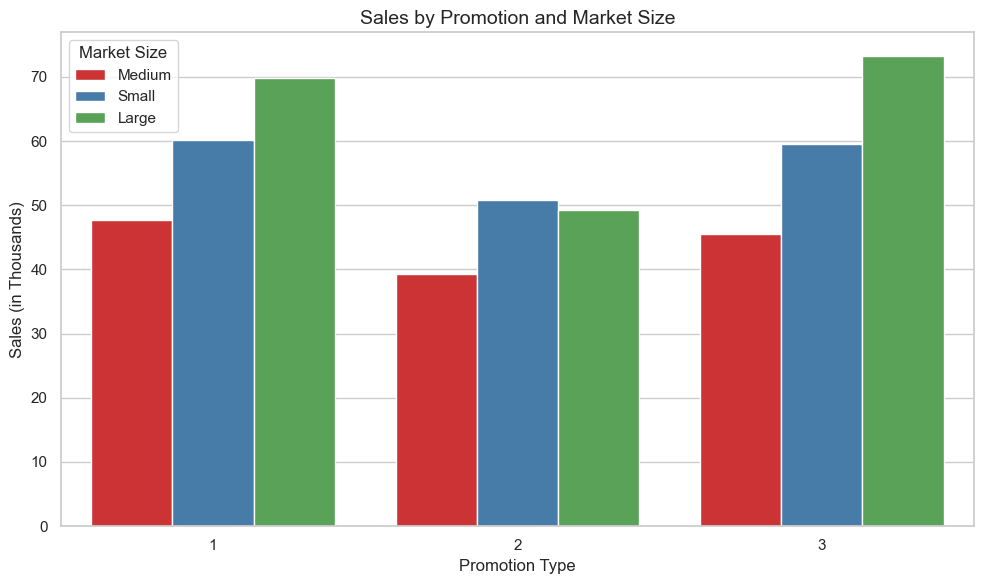

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=clean_df, x='Promotion', y='SalesInThousands', hue='MarketSize', errorbar=None, palette='Set1')
plt.title('Sales by Promotion and Market Size', fontsize=14)
plt.xlabel('Promotion Type', fontsize=12)
plt.ylabel('Sales (in Thousands)', fontsize=12)
plt.legend(title='Market Size', title_fontsize='12', fontsize='11')
plt.tight_layout()
plt.show()

In [16]:
marketing_df.shape

(548, 7)

In [17]:
clean_df.shape

(502, 7)

We removed an total of 46 outliers from the dataset

Plot visualisation of promotion before removing the outliers

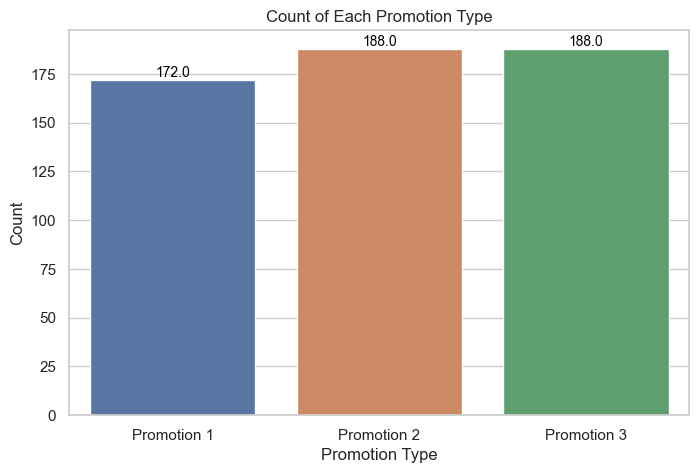

In [18]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Promotion', data=marketing_df)
plt.title('Count of Each Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Promotion 1', 'Promotion 2', 'Promotion 3'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

Plot visualisation of promotion after removing the outliers

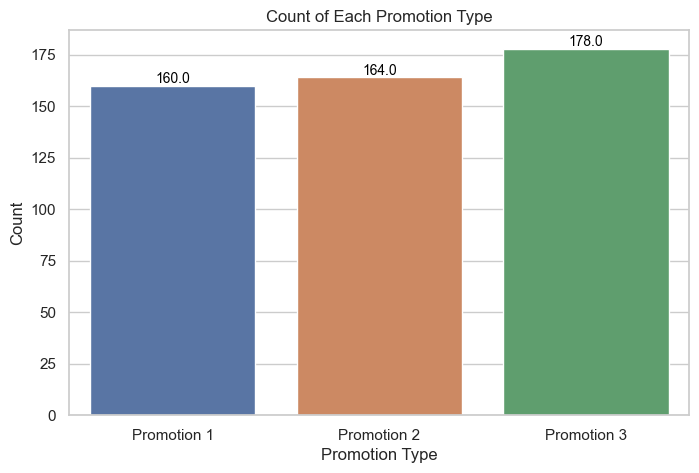

In [19]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Promotion', data=clean_df)
plt.title('Count of Each Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Promotion 1', 'Promotion 2', 'Promotion 3'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

From this we can see in each promotion promo 1 lost 12 sales in thousand and promo 2 lost 24 sales in thousand and promo 3 lost 10 sales in thousand after removing the outliers